In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def LDA(X0, X1):

    miu0 = np.mean(X0, axis=0).reshape((-1, 1))  # 均值miu0
    miu1 = np.mean(X1, axis=0).reshape((-1, 1))  # 均值miu1
    # 求协方差
    cov0 = np.cov(X0, rowvar=False)  # 协方差X0
    cov1 = np.cov(X1, rowvar=False)  # 协方差X1
    # 求出w
    S_w = np.mat(cov0 + cov1)  # sigma_w
    Omiga = S_w.I * (miu0 - miu1)  # 协方差矩阵的逆乘以均值差
    return Omiga  # 返回w


In [134]:
data = pd.read_csv('3.0a.csv')  # 读取数据
X_0 = np.array(data[data['好瓜'].isin([0])].iloc[:, 1:3],
               dtype='float')  # 取出坏瓜的数据
X_1 = np.array(data[data['好瓜'].isin([1])].iloc[:, 1:3],
               dtype='float')  # 取出好瓜的数据
X_0, X_1  # 查看数据


(array([[0.666, 0.091],
        [0.243, 0.267],
        [0.245, 0.057],
        [0.343, 0.099],
        [0.639, 0.161],
        [0.657, 0.198],
        [0.36 , 0.37 ],
        [0.593, 0.042],
        [0.719, 0.103]]),
 array([[0.697, 0.46 ],
        [0.774, 0.376],
        [0.634, 0.264],
        [0.608, 0.318],
        [0.556, 0.215],
        [0.403, 0.237],
        [0.481, 0.149],
        [0.437, 0.211]]))

In [135]:
w = LDA(X_0, X_1)  # 调用LDA函数
w  # 查看w


matrix([[-1.01674285],
        [-5.52422978]])

In [136]:
def mapping(w, X):#映射函数
    k = -w[0] / w[1]#求出k
    new_X = ((k * X[:, 1] + X[:, 0]) / (k * k + 1)).reshape(1, X.shape[0])#求出新的X
    new_X = np.insert(new_X, values=k * new_X, obj=1, axis=0)#插入y值
    return new_X.T#返回新的X


In [137]:
np.insert(w, values=0, axis=1, obj=0).T#插入0
w

matrix([[-1.01674285],
        [-5.52422978]])

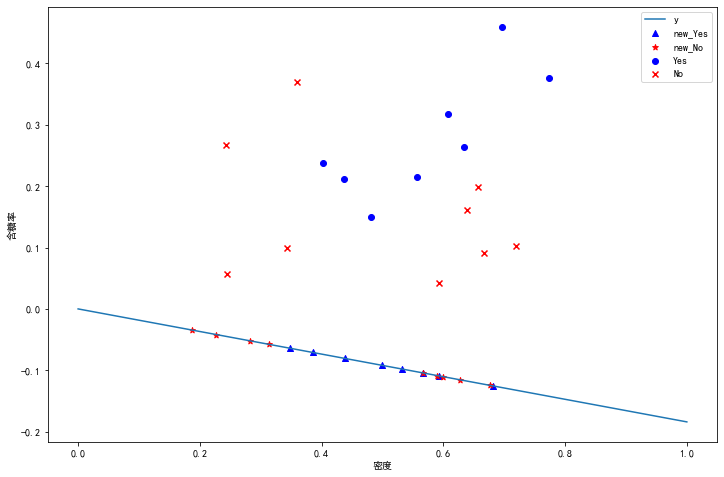

In [138]:
yes = data[data['好瓜'].isin([1])]  # 取出好瓜
no = data[data['好瓜'].isin([0])]  # 取出坏瓜
new_yes = mapping(w, X_1)  # 调用映射函数,求出新的X_1
new_no = mapping(w, X_0)  # 调用映射函数,求出新的X_0
fig, ax = plt.subplots(figsize=(12, 8))  # 设置图像大小
x = np.linspace(0, 0.2, 100)  # 构造x轴
ax.plot([0, 1], [0, -w[0] / w[1]], label='y=wx')  # 绘制y=wx
ax.scatter(new_yes[:, 0].tolist(), new_yes[:, 1].tolist(), marker='^',
           c='b', label='new_Yes')  # 画出新的好瓜
ax.scatter(new_no[:, 0].tolist(), new_no[:, 1].tolist(), marker='*',
           c='r', label='new_No')  # 画出新的坏瓜
ax.scatter(yes['密度'], yes['含糖率'], marker='o', c='b', label='Yes')  # 画出好瓜
ax.scatter(no['密度'], no['含糖率'], marker='x', c='r', label='No')  # 画出坏瓜
ax.legend()  # 画出图例
ax.set_xlabel('密度')  # 设置x轴标签
ax.set_ylabel('含糖率')  # 设置y轴标签
plt.show()  # 显示图像
